# Import libraries

In [154]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# Read the city png file

In [44]:
city_dir = "C:/Users/User/Desktop/MBSE/"

In [45]:
im_frame = Image.open(city_dir + 'city.png')
map_1d = np.array(im_frame.getdata())

## Convert 1d map grid to 2d

In [46]:
map_1d

array([[121,  85,  72, 255],
       [121,  85,  72, 255],
       [121,  85,  72, 255],
       ...,
       [121,  85,  72, 255],
       [121,  85,  72, 255],
       [121,  85,  72, 255]])

In [47]:
map_1d = np.delete(map_1d, -1, axis=1)

In [48]:
map_1d

array([[121,  85,  72],
       [121,  85,  72],
       [121,  85,  72],
       ...,
       [121,  85,  72],
       [121,  85,  72],
       [121,  85,  72]])

In [59]:
map_2d = np.reshape(map_1d, (60, 60, 1, 3))

In [64]:
np.shape(map_2d)

(60, 60, 1, 3)

In [74]:
rows = np.shape(map_2d)[0]
cols = np.shape(map_2d)[1]
height = 1
colors = np.shape(map_2d)[2]

In [75]:
map_2d[0,0,0,:]

array([121,  85,  72])

In [76]:
map_2d[2,2,0,:]

array([ 76, 175,  80])

In [77]:
map_2d[2,3,0,:]

array([  3, 169, 244])

In [78]:
map_2d[30,30,0,:]

array([255, 255, 255])

## initialize color variables as their corresponding rgb values

In [93]:
brown = [121, 85, 72]
green = [76, 175, 80]
blue = [3, 169, 244]
white = [255,255,255]

## Convert rgb values to chars : 
    road = 't'
    trees = 'g'
    building = 'b'
    nothing = 'w'

In [107]:
map_2d_list = [[[  [] for _ in range(height)] for _ in range(cols)] for _ in range(rows)]

In [108]:
for i in range(rows):
    for j in range(cols):
        if map_2d[i,j,0,:].tolist() == brown:
            map_2d_list[i][j][0] = 't'
        elif map_2d[i,j,0,:].tolist() == green:
            map_2d_list[i][j][0] = 'g'
        elif map_2d[i,j,0,:].tolist() == blue:
            map_2d_list[i][j][0] = 'b'
        elif map_2d[i,j,0,:].tolist() == white:
            map_2d_list[i][j][0] = 'w'

In [110]:
np.shape(map_2d_list)

(60, 60, 1)

## Split each cell to 3 cells 15m = (5+5+5)m

In [111]:
map_3d = [[[  [] for _ in range(height*3)] for _ in range(cols*3)] for _ in range(rows*3)]

In [112]:
np.shape(map_3d)

(180, 180, 3, 0)

## Convert 2d map grid to 3d

In [156]:
for i in range(rows):
    for j in range(cols):
        for k in range(height):
            for t1 in range(3):
                for t2 in range(3):
                    for t3 in range(3):
                        map_3d[i*3 + t1][j*3 + t2][k*3 + t3] = map_2d_list[i][j][k]

In [157]:
# set new rows, col, height numbers
rows = 180
cols = 180
height = 3

In [158]:
for i in range(rows):
    for j in [1, 2]:
        for k in range(height):
            if map_3d[i][j][k] == 't':
                map_3d[i][j][k] = 'w'

In [159]:
np.shape(map_3d)

(180, 180, 3)

In [160]:
map_3d

[[['t', 't', 't'],
  ['w', 'w', 'w'],
  ['w', 'w', 'w'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't', 't'],
  ['t', 't',

# Visualize 3d grid

In [161]:
x1 = []
x2 = []
x3 = []
x4 = []
y1 = []
y2 = []
y3 = []
y4 = []
z1 = []
z2 = []
z3 = []
z4 = []

for i in range(rows):
    for j in range(cols):
        for k in range(height):
            if map_3d[i][j][k]=='t':
                x1.append(i)
                y1.append(j)
                z1.append(k)
            elif map_3d[i][j][k]=='g':
                x2.append(i)
                y2.append(j)
                z2.append(k)
            elif map_3d[i][j][k]=='b':
                x3.append(i)
                y3.append(j)
                z3.append(k)
            elif map_3d[i][j][k]=='w':
                x4.append(i)
                y4.append(j)
                z4.append(k)

<IPython.core.display.Javascript object>


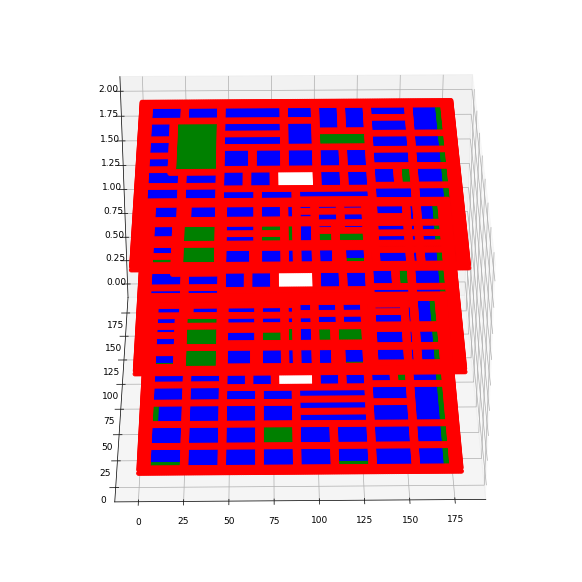

In [162]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='red', alpha=1)
ax.scatter(x2, y2, z2, c='green', alpha=1)
ax.scatter(x3, y3, z3, c='blue', alpha=1)
ax.scatter(x4, y4, z4, c='white', alpha=1)
plt.show()

# Initialize the objects

In [4]:
# class that contains all the grid cells
class grid_cell():
    def __init__(self, x,y,z):
        self.x = x # x coordinate
        self.y = y # y coordinate
        self.z = z # z coordinate
        self.building_flag = False
        self.tree_flag = False
        self.car_flag = False
        self.road_flag = False
        self.item = None
        self.co2 = None

In [5]:
# class for the entire grid
class grid():
    def __init__(self):
        self.rows = 20;
        self.cols = 20;
        self.height = 5;
        
        # initialize all the grid cells
        self.grid3d = []
        for i in range(0,self.rows):
            self.grid3d.append([])
            for j in range(0,self.cols):
                self.grid3d[i].append([])
                for k in range(0,self.height):
                    self.grid3d[i][j].append([grid_cell(i,j,k)])

In [2]:
# car objects
class vehicle():
    def __init__(self, fuel_type, speed):
        self.fuel_type = fuel_type
        self.speed = speed
        
        self.co2 = 5;

In [3]:
# building objects
class building():
    def __init__(self, sensor_flag, h):
        self.sensor_flag = sensor_flag
        self.height = h

In [ ]:
# road object
class road():
    def __init__(self, speed_limit):
        self.speed_limit = speed_limit

# Initialize the environment

In [6]:
# initialize the entire grid
city = grid();

In [9]:
print(len(city.grid3d), len(city.grid3d[0]), len(city.grid3d[0][0]))

20 20 4


## Initialize the roads

### High roads

In [ ]:
# initialize the high roads
for i in range(0,2):
    for j in range(0,city.cols):
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 90
        
for i in range(2,18):
    for j in range(0,2):
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 90
        
for i in range(2,18):
    for j in range(18,20):
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 90
        
for i in range(18,20):
    for j in range(0,city.cols):
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 90

### Main city road

In [ ]:
# initialize the main city road
for i in range(2,18):
    j = 11
    k = 0
    city.grid3d[i][j][k].road_flag = True
    city.grid3d[i][j][k].item = road()
    city.grid3d[i][j][k].item.speed_limit = 50

### School roads

In [ ]:
# initialize the school roads
for i,j in [[5,3], [5,4], [5,5], [6,5], [7,5], [8,5], [9,5], [10,5], [11,5], [11,4], [11,3]]:
    k = 0
    city.grid3d[i][j][k].road_flag = True
    city.grid3d[i][j][k].item = road()
    city.grid3d[i][j][k].item.speed_limit = 20

### Rest of city roads

In [ ]:
# horizontal roads
for i in [4, 10, 15]:
    for j in range(2,18):
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 40

In [ ]:
# lateral roads
for i in range(2,18):
    for j in [7, 10]:
        k = 0
        city.grid3d[i][j][k].road_flag = True
        city.grid3d[i][j][k].item = road()
        city.grid3d[i][j][k].item.speed_limit = 40

### City buildings

### City trees

# Simulation functions

In [ ]:
# calculate the CO2
def calculate_co2():
    # calculate car emissions
    co2_sum = 0
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].car_flag:
                    co2_sum += city.grid3d[i][j][k].co2

In [ ]:
# apply wind effect
def apply_wind():
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].co2:
                    

In [ ]:
# apply air dispersion dynamics
def apply_co2_dispersion():
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].co2:


# Run the simulation

In [ ]:
simulation_flag = True

# run the simulation
iteration = -1
while (simulation_flag):
    iteration +=1
    print("iteration # ", iteration)
    
    # iterate over the entire grid
    calculate_co2()
    
    # calculate wind effect
    apply_wind()
    
    # apply dispersion
    apply_co2_dispersion()
                